In [1]:
import numpy as np
import scipy.linalg as sci
import numpy as np
from numpy import linalg as lg

import sys
import matplotlib.pyplot as plt

sys.path.append("..")
import helper.helper as h

Assumption: We can write any permutation matrix $$P = \prod_{i,j: i < j} P_{ij}^{\alpha_{ij}}$$ for $\alpha_{ij} \in \{0, 1\}$. Here $P_{ij}$ is the transposition matrix that permutes row $i$ and $j$. We know that we can write any permutation matrix as a composition of transposition matrices, but note that the product above has a fixed order.

An easy way to verify that each permutation matrix can be decomposed using at most $n - 1$ non-zero $\alpha_{ij}$, we consider a $\textit{selection sort}$ approach. Let $j$ be the row where the first entry is a 1. We swap row $i = 1$ and row $j$. Then, let $j$ be the row where the second entry is a 1 ($j > 1>$). We swap row $i = 2$ and row $j$. We do this $n - 1$ times after which the first $n - 1$ entries are correct, and since we have $n$ entries in total, all $n$ entries are correct.

If that is indeed true we have a valid representation of all permutation matrices, parametrized through the ${n \choose 2}$
parameters $\mathbf{α}$. This we can relax now by letting $\alpha \in \mathbb{R}^{n \choose 2}$, where we define the diagonal decomposition of $P_{ij}^{\alpha_{ij}}$ as $$P_{ij}^{\alpha_{ij}} = U^TD^{\alpha_{ij}}U.$$
We know that $D = \text{diag}(−1, 1, 1, ....)$, so $D^{\alpha_{ij}} = \text{diag}(c, 1, 1...)$, where $c$ is a complex number. 

This representation will avoid having problems with the inverse, as $$\left(P = \prod_{i,j: i < j} P_{ij}^{\alpha_{ij}}\right)^{-1} = \prod_{i,j: i < j} \left(P_{ij}^{\alpha_{ij}}\right)^{-1}.$$
Now, for $\alpha_{ij} \in \{0, 1\}$, the inverse is simply
$$\left(P_{ij}^{\alpha_{ij}}\right)^{-1} = \left(P_{ij}^{\alpha_{ij}}\right)^T = P_{ij}^{\alpha_{ij}},$$
which in fact is swapping $\textit{column}$ $i$ and $j$, rather than row $i$ and $j$.
Now, for $\alpha_{ij} \in \mathbb{R}$, the inverse is slightly more involved, but still doable.
$$A^\beta = e^{\beta \ln(A)} = \sum_{k=0}^\infty\frac{1}{k!}\left(\beta \ln(A)\right)^k.$$

In [3]:
# dimension
n = 4

# permutation matrix
P = np.identity(n)

# get the two rows to swap
i, j = np.random.choice(n, 2, replace = False)

# swap row i and row j
P[[i, j]] = P[[j, i]]

# print P
print("P:\n", P)

print("P^T:\n", P.T)

print("P^-1:\n", lg.inv(P))

P:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]
P^T:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]
P^-1:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]


### Decompositions
#### Eigendecomposition
Since we know that we only permute two rows, we know that the eigenvalues are $\lambda_1 = -1, \lambda_i = 1, i = 1, \cdots, n.$ Hence, there is an eigendecomposition
$$P^{\alpha_{ij}}_{ij} = U \Lambda U^T,$$
where $$\Lambda = \text{diag}\left(-1, 1, \ldots, 1\right).$$

In [4]:
# get eigenvectors, eigenvalues
evls, evcs = lg.eig(P)

# print eigenvalues, eigenvectors
for evl, evc in zip(evls, evcs.T):
    print("lambda:", evl, "eigenvector:", np.round(evc, 2))

# print results
print("\nULUT:\n", evcs @ np.diag(evls) @ evcs.T)

lambda: 1.0 eigenvector: [0.   0.   0.71 0.71]
lambda: -1.0 eigenvector: [ 0.    0.   -0.71  0.71]
lambda: 1.0 eigenvector: [1. 0. 0. 0.]
lambda: 1.0 eigenvector: [0. 1. 0. 0.]

ULUT:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]


In [5]:
print("Eigenvectors:\n", np.round(evcs, 2))
print("\nTranspose:\n", np.round(evcs.T, 2))
print("\nInverse:\n", np.round(lg.inv(evcs), 2))

Eigenvectors:
 [[ 0.    0.    1.    0.  ]
 [ 0.    0.    0.    1.  ]
 [ 0.71 -0.71  0.    0.  ]
 [ 0.71  0.71  0.    0.  ]]

Transpose:
 [[ 0.    0.    0.71  0.71]
 [ 0.    0.   -0.71  0.71]
 [ 1.    0.    0.    0.  ]
 [ 0.    1.    0.    0.  ]]

Inverse:
 [[ 0.    0.    0.71  0.71]
 [ 0.    0.   -0.71  0.71]
 [ 1.    0.    0.    0.  ]
 [ 0.    1.    0.    0.  ]]


In [6]:
print("PU:\n", np.round(P @ evcs, 2))

print("\nlambda U:\n", np.round(evls * evcs, 2))

PU:
 [[ 0.    0.    1.    0.  ]
 [ 0.    0.    0.    1.  ]
 [ 0.71  0.71  0.    0.  ]
 [ 0.71 -0.71  0.    0.  ]]

lambda U:
 [[ 0.   -0.    1.    0.  ]
 [ 0.   -0.    0.    1.  ]
 [ 0.71  0.71  0.    0.  ]
 [ 0.71 -0.71  0.    0.  ]]


In [7]:
P = np.array([[1, 0, 0], [0, 0, 1], [0, 1, 0]])
P_pow = sci.fractional_matrix_power(P, 1.25)
print(P_pow)

lu, d, perm = sci.ldl(P, lower = 0)
print("LU:\n", lu[perm, :])
print("D:\n", d)
print("perm:\n", perm)

[[1.        +0.j         0.        +0.j         0.        +0.j        ]
 [0.        +0.j         0.14644661-0.35355339j 0.85355339+0.35355339j]
 [0.        +0.j         0.85355339+0.35355339j 0.14644661-0.35355339j]]
LU:
 [[ 1. -0. -0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]
D:
 [[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
perm:
 [0 1 2]


In [8]:
D = np.diag((-1, 1, 1))
print(D)
print(sci.fractional_matrix_power(D, 1.75))

[[-1  0  0]
 [ 0  1  0]
 [ 0  0  1]]
[[0.70710678-0.70710678j 0.        +0.j         0.        +0.j        ]
 [0.        +0.j         1.        +0.j         0.        +0.j        ]
 [0.        +0.j         0.        +0.j         1.        +0.j        ]]


In [9]:
def get_evcs(n, i, j):
    c = 0.5 * np.sqrt(2)
                      
    U = np.identity(n)
    
    Lambda = np.ones(n)
    Lambda[j - 1] = -1
    Lambda = np.diag(Lambda)

    row_i = np.zeros(n)
    row_i[i - 1], row_i[j - 1] = c, c
    U[j - 1] = row_i
    
    row_j = row_i
    row_j[j - 1] *= -1
    U[i - 1] = row_j
    
    return U, Lambda

In [10]:
U, Lambda = get_evcs(3, 1, 3)
print(U, Lambda)

print(np.round(U @ Lambda @ U.T))

[[ 0.70710678  0.         -0.70710678]
 [ 0.          1.          0.        ]
 [ 0.70710678  0.          0.70710678]] [[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0. -1.]]
[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


### How does $P_{ij}^{\alpha_{ij}}$ look?
We know that it is a permutation matrix, in fact, the identity matrix with row $i$ and row $j$ swapped. This means that for $\alpha_{ij} \in \{0, 1\}$, the inverse of $$\left(P_{ij}^{\alpha_{ij}}\right)^{-1} = \left(P_{ij}^{\alpha_{ij}}\right)^T = P_{ij}^{\alpha_{ij}}.$$

We know that the eigenvalues, for $\alpha_{ij} = 1$ are 
$$\mathbf{\lambda} = \left(1,\ldots, 1, \underbrace{-1}_{\text{index} j}, 1, \ldots, 1\right),$$
where the eigenvectors are

$$\mathbf{u}_k = \begin{cases} e_k & \text{if $k \neq i$ and $k \neq j$}\\ \frac{1}{2}\sqrt{2} \left(e_i + e_j\right) & \text{if $k = i$} \\ \frac{1}{2}\sqrt{2} \left(e_i - e_j\right) & \text{if $k = j$} \end{cases}.$$
We can of course swap rows of $U$, as long as we also swap the entries of $\lambda$ as well. 

In [11]:
# dimension
n = 3

# permutation matrix
P = np.identity(n)

# get the two rows to swap
i, j = np.random.choice(n, 2, replace = False)

# swap row i and row j
P[[i, j]] = P[[j, i]]

# print P
print("P:\n", P)

P:
 [[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [12]:
print(sci.fractional_matrix_power(Lambda, 1.3))

[[ 1.        +0.j          0.        +0.j          0.        +0.j        ]
 [ 0.        +0.j          1.        +0.j          0.        +0.j        ]
 [ 0.        +0.j          0.        +0.j         -0.58778525-0.80901699j]]


In [13]:
U, Lambda = get_evcs(n, i, j)

In [16]:
U, Lambda = get_evcs(n, i + 1, j + 1)
print(U, Lambda)

print(np.round(U @ Lambda @ U.T))
print(U @ sci.fractional_matrix_power(Lambda, 1.0) @ U.T)

[[ 0.70710678  0.         -0.70710678]
 [ 0.          1.          0.        ]
 [ 0.70710678  0.          0.70710678]] [[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0. -1.]]
[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]
[[4.26642159e-17 0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 4.26642159e-17]]


Now letting $\alpha_{ij} \in \mathbb{R}$, we get that 
$$P_{ij}^{\alpha_{ij}} = U \Lambda^{\alpha_{ij}} U^T.$$
Now, $$\Lambda^{\alpha_{ij}} = \text{diag}\left(1,\ldots, 1, \underbrace{-1^{\alpha_{ij}}}_{\text{index} j}, 1, \ldots, 1\right),$$
where $$-1^{\alpha_{ij}} = \cos (\pi \alpha) + i \sin(\pi \alpha)$$

In [22]:
def P_aij(alpha):
    i, j = 1, 3
    U, Lambda = get_evcs(n, i, j)
    Lambda = Lambda.astype('csingle')
    Lambda[j - 1][j - 1] = (np.cos(np.pi * alpha) + 1j * np.sin(np.pi * alpha))
    
    print(U @ Lambda @ U.T)

alpha = 1.3
print(sci.fractional_matrix_power(P, alpha))
P_aij(alpha)

[[0.20610737-0.4045085j 0.        +0.j        0.79389263+0.4045085j]
 [0.        +0.j        1.        +0.j        0.        +0.j       ]
 [0.79389263+0.4045085j 0.        +0.j        0.20610737-0.4045085j]]
[[0.20610738-0.4045085j 0.        +0.j        0.79389262+0.4045085j]
 [0.        +0.j        1.        +0.j        0.        +0.j       ]
 [0.79389262+0.4045085j 0.        +0.j        0.20610738-0.4045085j]]


# 3D example of $P$
Let us consider the matrix 
$$P = \begin{pmatrix}0 & 1 & 0 \\ 0 & 0 & 1 \\ 1 & 0 & 0\end{pmatrix}.$$
This can be achieved by finding the parameters
$$a_{12} = 0, a_{13} = 1, a_{23} = 1,$$
yielding
$$\begin{align*}P_{12}^1 P_{13}^0 P_{23}^1 &= \begin{pmatrix}0 & 1 & 0 \\ 1 & 0 & 0 \\ 0 & 0 & 1\end{pmatrix}^0 \begin{pmatrix}0 & 0 & 1 \\ 0 & 1 & 0 \\ 1 & 0 & 0\end{pmatrix}^1 \begin{pmatrix}1 & 0 & 0 \\ 0 & 0 & 1 \\ 0 & 1 & 0\end{pmatrix}^1\\ &= \begin{pmatrix}0 & 0 & 1 \\ 0 & 1 & 0 \\ 1 & 0 & 0\end{pmatrix}\begin{pmatrix}1 & 0 & 0 \\ 0 & 0 & 1 \\ 0 & 1 & 0\end{pmatrix} \\ &= \begin{pmatrix}0 & 1 & 0 \\ 0 & 0 & 1 \\ 1 & 0 & 0\end{pmatrix} = P.\end{align*}$$

In [24]:
def compute_P_alpha_ij(n, i, j, alpha):
    "Returns an indentity matrix with row i and j swapped"
        
    P = np.identity(n)
    # swap row i and row j
    P[[i - 1, j - 1]] = P[[j - 1, i - 1]]
    
    return sci.fractional_matrix_power(P, alpha)

In [25]:
print(compute_P_alpha_ij(3, 1, 2, 0.3))
print(lg.inv(compute_P_alpha_ij(3, 1, 2, 0.3)))

[[0.79389263+0.4045085j 0.20610737-0.4045085j 0.        +0.j       ]
 [0.20610737-0.4045085j 0.79389263+0.4045085j 0.        +0.j       ]
 [0.        +0.j        0.        +0.j        1.        +0.j       ]]
[[0.79389263-0.4045085j 0.20610737+0.4045085j 0.        +0.j       ]
 [0.20610737+0.4045085j 0.79389263-0.4045085j 0.        +0.j       ]
 [0.        +0.j        0.        +0.j        1.        +0.j       ]]


In [317]:
print(compute_P_alpha_ij(n, 1, 3, 1) @ compute_P_alpha_ij(n, 2, 3, 1))

[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


### Inverse of P
As $P$ is a permutation matrix, we know that
$$P^{-1} = P^T.$$
Luckily, we also have an easy way to rewrite this in terms of $P_{ij}^{\alpha_{ij}}$, namely
$$P^T = \left(\prod_{i = 1,j = 1: i < j}^n P_{ij}^{\alpha_{ij}}\right)^{T} = \left(\prod_{i = n,j = n: i < j}^1 P_{ij}^{\alpha_{ij}}\right).$$
In other words, we reverse the order of multiplication.

In [287]:
print(compute_P_alpha_ij(n, 2, 3) @ compute_P_alpha_ij(n, 1, 3))
print(compute_P_alpha_ij(n, 1, 2))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]
[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


## Learning the parameters $\alpha_{ij}$
We are now interested in learning the ${n \choose 2}$ parameters $\alpha_{ij}$. We propose to do this by gradient descent. For this, we first need the cost function, which is the well-known
$$C(P, A) = \lVert \mathbf{X}_{[1:T]} - X_{[0:T-1]} P^{-1}AP\rVert_2^2.$$

For a given permutation $A$, we define
$$C(P) = \underset{A \text{ lower triangular}}{\arg \min} C(A, P),$$
which can easily be derived, as there is a closed form least squares solution.
### Derivative of $P_{ij}^{\alpha_{ij}}$
$$\frac{\partial P_{ij}^{\alpha_{ij}}}{\partial \alpha_{ij}} = U \left(\frac{\partial \Lambda^{\alpha_{ij}}}{\partial \alpha_{ij}} \right) U^T`,$$
where $$\frac{\partial \Lambda^{\alpha_{ij}}}{\partial \alpha_{ij}} = \text{diag}\left(0,\ldots, 0, \underbrace{-\pi \sin(\pi \alpha_{ij}) + i\pi cos(\pi \alpha_{ij})}_{\text{index} j}, 0, \ldots, 0\right)$$

In [28]:
def compute_P_pos_alphas(n, alphas):
    """Compute P
    @params n: the dimension number n
    @params alphas: list of all the i, j values that are 1
    """
    
    P = np.identity(n)
    
    for alpha in alphas:
        P = P @ compute_P_alpha_ij(n, alpha[0], alpha[1], 1)
        
    return P

def compute_P_alpha_coefs(n, alpha_coefs):
    """Compute P
    @params n: the dimension number n
    @params alpha_coefs: list of the n choose 2 coefficients corresponding to the alphas_ij
    """
    
    P = np.identity(n)
    
    param = 0
    for i in range(n):
        for j in range(i + 1, n):
            
            if alpha_coefs[param] != 0:
                P = P @ compute_P_alpha_ij(n, i + 1, j + 1, alpha_coefs[param])
            
            param += 1
            
    return P

compute_P_pos_alphas(n, [[2, 3], [1, 3]])
compute_P_alpha_coefs(3, [0, 0, 1])

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [29]:
print(np.round(lg.inv(compute_P_alpha_coefs(3, [0.5, 0.5, 0.5])), 2))
print(np.conj(compute_P_alpha_ij(3, 2, 3, 0.5)) @ np.conj(compute_P_alpha_ij(3, 1, 3, 0.5)) @ np.conj(compute_P_alpha_ij(3, 1, 2, 0.5)))

[[ 0.  -0.5j   0.5 +0.j    0.5 +0.5j ]
 [ 0.75+0.25j -0.25-0.25j  0.5 +0.j  ]
 [ 0.25+0.25j  0.75+0.25j  0.  -0.5j ]]
[[ 0.  -0.5j   0.5 +0.j    0.5 +0.5j ]
 [ 0.75+0.25j -0.25-0.25j  0.5 +0.j  ]
 [ 0.25+0.25j  0.75+0.25j  0.  -0.5j ]]


A:
[[-0.5  0. ]
 [ 0.5  0.5]]

P:
[[1. 0.]
 [0. 1.]].

W:
[[-0.5  0. ]
 [ 0.5  0.5]].




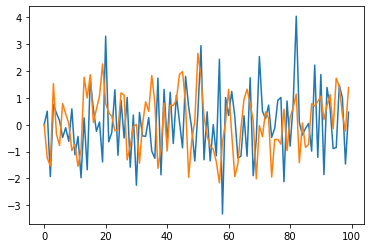

In [103]:
np.random.seed(seed = 2)

## Number of dimensions, number of edges, number of samples
T, n, s = 100, 2, 3

## Coefficient matrix
A_true = h.generate_A(n, s, high = 0.5)

## True permutation
P_true = np.identity(n)

## Generate series
X = h.generate_var_2(T, n, A_true, P_true)
plt.plot(X);

print(f"A:\n{np.round(A_true, 2)}\n\nP:\n{P_true}.\n")

print(f"W:\n{np.round(P_true.T @ A_true @ P_true, 2)}.\n\n")

In [111]:
def C(P, A, l_complex = 0):
    
    # Get prediction data
    M = X @ lg.inv(P) @ A @ P
    
    # Remove X[0] and XW[last]
    R = X[1:] - M[:-1]
    
    # Frobenius norm squared loss
    loss = 1 / X[1:].shape[0] * (R ** 2).sum()
    
    # Return loss
    return loss + l_complex * np.abs(loss.imag)

def C_2(P, A, l_complex = 0):
    
    # Get prediction data
    M = X @ lg.inv(P) @ A @ P
    
    # Remove X[0] and XW[last]
    R = X[1:] - M[:-1]
    
    # Frobenius norm squared loss
    loss = 1 / X[1:].shape[0] * (lg.norm(R) ** 2).sum()
    
    # Return loss
    return loss

In [113]:
print(C(P_true + 0.90j, A_true))
print(C(P_true, A_true))
print(C_2(P_true, A_true))
print(C_2(P_true + 0.90j, A_true))

(0.0027876530955537374+0.09521907210904498j)
2.2803592407294446
2.280359240729444
4.514863344588357


In [115]:
alpha = 0.1
print(compute_P_alpha_coefs(2, [1 - alpha]))
print(compute_P_alpha_coefs(2, [1 + alpha]))
# print(C(compute_P_alpha_coefs(2, [1.3]), A_true)) 

[[0.02447174+0.1545085j 0.97552826-0.1545085j]
 [0.97552826-0.1545085j 0.02447174+0.1545085j]]
[[0.02447174-0.1545085j 0.97552826+0.1545085j]
 [0.97552826+0.1545085j 0.02447174-0.1545085j]]


### Conclusion
We see that when we extend P to the complex domain, we can attain values lower than the optimal loss, which means that something goes wrong here. The only approach is to penalize complex values. However, we do not want to penalize too heavily as then we can never use the complex plane to retrieve good solutions.

However, as the complex value can be negative, we need to make sure we either square it or take the absolute value to make sure the penalization is indeed a penalization and not a subtraction of the loss.

In [108]:
print(C(compute_P_alpha_coefs(2, [0.1]), A_true, l_complex = 1e2)) 
print(C(compute_P_alpha_coefs(2, [1]), A_true))

(5.933628612522281+0.037340275422239826j)
5.1509109807742695


In [109]:
from operator import add

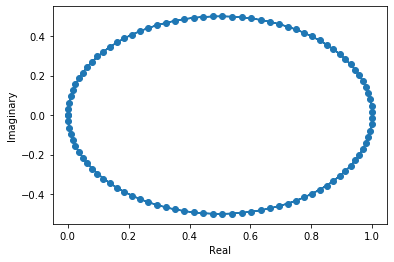

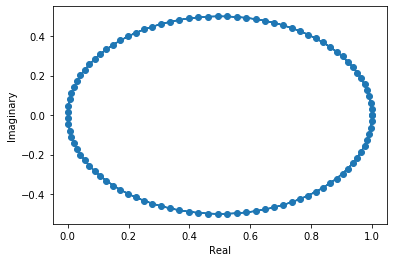

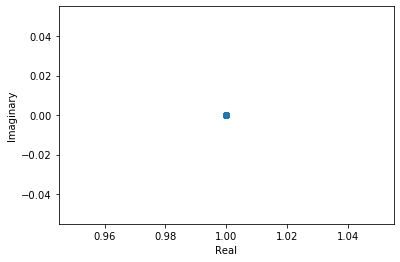

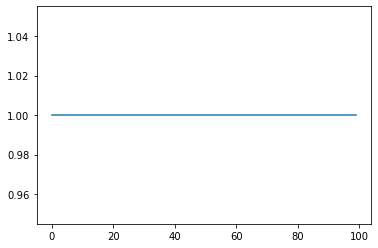

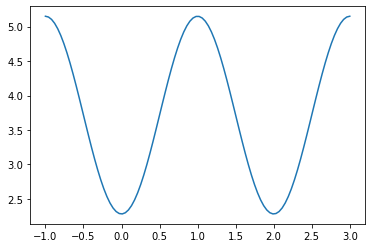

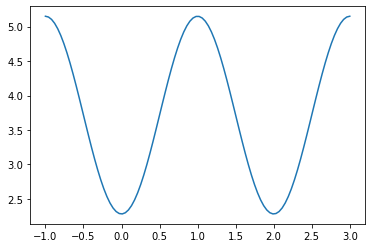

In [112]:
alpha_list = np.linspace(-1.0, 3.0, 100)

results = [[], [], [], []]
for alpha in alpha_list:
    results[0].append(compute_P_alpha_coefs(2, [alpha])[0][0])
    results[1].append(compute_P_alpha_coefs(2, [alpha])[0][1])

    results[2].append(C_2(compute_P_alpha_coefs(2, [alpha]), A_true)) 
    results[3].append(C_2(compute_P_alpha_coefs(2, [alpha]), A_true, l_complex = 2.70)) 
    
# extract real part
x1 = [ele.real for ele in results[0]]
# extract imaginary part
y1 = [ele.imag for ele in results[0]]
  
# plot the complex numbers
plt.plot(x1, y1, '-o')
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.show()

# extract real part
x2 = [ele.real for ele in results[1]]
# extract imaginary part
y2 = [ele.imag for ele in results[1]]
  
# plot the complex numbers
plt.plot(x2, y2, '-o')
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.show()

# plot the complex numbers

x3 = list(map(add, x1, x2))
y3 = list(map(add, y1, y2))

plt.plot(x3, y3, '-o')
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.show()

plt.plot(np.abs(list(map(add, results[0], results[1]))))
plt.show()

plt.plot(alpha_list, results[2])
plt.show()

plt.plot(alpha_list, results[3])
plt.show()

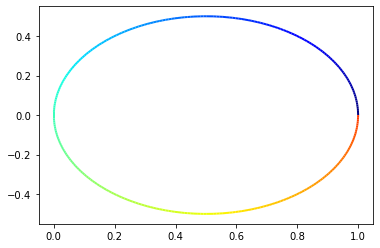

In [542]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.collections as mcoll
import matplotlib.path as mpath

def colorline(
    x, y, z=None, cmap=plt.get_cmap('copper'), norm=plt.Normalize(0.0, 1.0),
        linewidth=3, alpha=1.0):
    """
    http://nbviewer.ipython.org/github/dpsanders/matplotlib-examples/blob/master/colorline.ipynb
    http://matplotlib.org/examples/pylab_examples/multicolored_line.html
    Plot a colored line with coordinates x and y
    Optionally specify colors in the array z
    Optionally specify a colormap, a norm function and a line width
    """

    # Default colors equally spaced on [0,1]:
    if z is None:
        z = np.linspace(0.0, 1.0, len(x))

    # Special case if a single number:
    if not hasattr(z, "__iter__"):  # to check for numerical input -- this is a hack
        z = np.array([z])

    z = np.asarray(z)

    segments = make_segments(x, y)
    lc = mcoll.LineCollection(segments, array=z, cmap=cmap, norm=norm,
                              linewidth=linewidth, alpha=alpha)

    ax = plt.gca()
    ax.add_collection(lc)

    return lc


def make_segments(x, y):
    """
    Create list of line segments from x and y coordinates, in the correct format
    for LineCollection: an array of the form numlines x (points per line) x 2 (x
    and y) array
    """

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    return segments


fig, ax = plt.subplots()
path = mpath.Path(np.column_stack([x1, y1]))
verts = path.interpolated(steps=3).vertices
x, y = verts[:, 0], verts[:, 1]
z = np.linspace(0, 1, 350)
colorline(x, y, z, cmap=plt.get_cmap('jet'), linewidth=2)
plt.xlim(-0.05, 1.05)
plt.ylim(-0.55, 0.55)
plt.show()

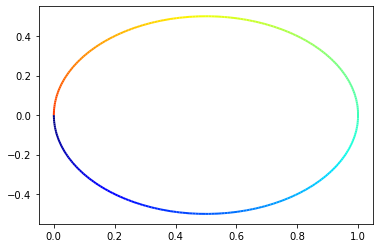

In [543]:
fig, ax = plt.subplots()
path = mpath.Path(np.column_stack([x2, y2]))
verts = path.interpolated(steps=3).vertices
x, y = verts[:, 0], verts[:, 1]
z = np.linspace(0, 1, 350)
colorline(x, y, z, cmap=plt.get_cmap('jet'), linewidth=2)
plt.xlim(-0.05, 1.05)
plt.ylim(-0.55, 0.55)
plt.show()

A:
[[ 0.3  0.   0. ]
 [ 0.3 -0.3  0. ]
 [-0.3 -0.3  0.3]]

P:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]].

W:
[[ 0.3  0.   0. ]
 [ 0.3 -0.3  0. ]
 [-0.3 -0.3  0.3]].




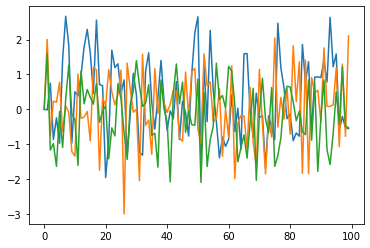

In [131]:
np.random.seed(seed = 2)

## Number of dimensions, number of edges, number of samples
T, n, s = 100, 3, 6

## Coefficient matrix
A_true = h.generate_A(n, s, low = 0.3, high = 0.3)

## True permutation
P_true = np.identity(n)

## Generate series
X = h.generate_var_2(T, n, A_true, P_true)
plt.plot(X);

print(f"A:\n{np.round(A_true, 2)}\n\nP:\n{P_true}.\n")

print(f"W:\n{np.round(P_true.T @ A_true @ P_true, 2)}.\n\n")

In [139]:
compute_P_alpha_coefs(3, [0, 0, 0])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

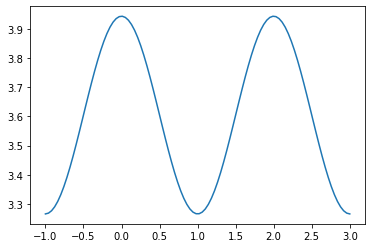

In [136]:
alpha_list = np.linspace(-1.0, 3.0, 100)

alpha_1, alpha_2 = 1.0, 1.0

results = [[]]
for alpha in alpha_list:
    results[0].append(C_2(compute_P_alpha_coefs(3, [alpha_1, alpha_2, alpha]), A_true)) 
    
plt.plot(alpha_list, results[0])
plt.show()